In [6]:
##Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from scipy.stats import norm, skew 

#import pandas_profiling

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

pd.pandas.set_option('display.max_columns',None)

In [7]:
###Setting data path to file variable
file='C:/Users/Downloads/Data_Iris.csv'
df=pd.read_csv(file,sep=',',header=0)

In [8]:
###Checking no of rows and columns, columns, length of data 
print("\n data lenght :", df.shape)
print("\n data columns :", df.columns)
print("\n data size:", len(df))
print("\n data info:", df.info())
print("\n display first 5 rows of data ", df.head(5))


 data lenght : (150, 5)

 data columns : Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class'],
      dtype='object')

 data size: 150
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

 data info: None

 display first 5 rows of data     sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0              5.1             3.5              1.4             0.2   
1              4.9             3.0              1.4             0.2   
2              4.7             3.2              1.3             0.2   
3        

In [11]:
###Data distribution
print("\n central tendancy",df.describe())
print("\nvalues at 100th percentile",df.quantile(1))


 central tendancy        sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
count       150.000000      150.000000       150.000000      145.000000
mean          5.644627        3.054667         3.758667        1.236552
std           1.312781        0.433123         1.764420        0.755058
min           0.055000        2.000000         1.000000        0.100000
25%           5.100000        2.800000         1.600000        0.400000
50%           5.700000        3.000000         4.350000        1.300000
75%           6.400000        3.300000         5.100000        1.800000
max           7.900000        4.400000         6.900000        2.500000

values at 100th percentile sepal_length_cm    7.9
sepal_width_cm     4.4
petal_length_cm    6.9
petal_width_cm     2.5
Name: 1, dtype: float64


In [ ]:
##Interquartile (IQR) range is another common measure of spread. IQR is the distance between the 3rd quartile and the 1st quartile:

In [12]:
df.quantile(0.75) - df.quantile(0.25)

sepal_length_cm    1.3
sepal_width_cm     0.5
petal_length_cm    3.5
petal_width_cm     1.4
dtype: float64

In [14]:
###Checking variance and std dev
print("variance:",df.var())
print("\nstandard deviation:",df.std()) 
###df.skew()
##df.kurt()

variance: sepal_length_cm    1.723395
sepal_width_cm     0.187596
petal_length_cm    3.113179
petal_width_cm     0.570113
dtype: float64

standard deviation: sepal_length_cm    1.312781
sepal_width_cm     0.433123
petal_length_cm    1.764420
petal_width_cm     0.755058
dtype: float64


In [9]:
###Checking missing values in the data
df.isnull().sum().sort_values(ascending=False)

petal_width_cm     5
class              0
petal_length_cm    0
sepal_width_cm     0
sepal_length_cm    0
dtype: int64

In [10]:
###Checking categorical columns in the data
categorical_feature=[feature for feature in df.columns if df.dtypes[feature]=='object']
categorical_feature

['class']

In [12]:
## value counts
df['class'].value_counts()

Iris-virginica     50
Iris-setosa        49
Iris-versicolor    45
versicolor          5
Iris-setossa        1
Name: class, dtype: int64

In [15]:
### unique values in class column and checking duplicate values
df['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [16]:
###Replacing the duplicate values with original values
df['class']=df['class'].replace("Iris-setossa","Iris-setosa")
df['class']=df['class'].replace("versicolor","Iris-versicolor")

In [17]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

In [19]:
##Checing numerical columns
numerical_feature=[feature for feature in df.columns if df.dtypes[feature] !='object']
numerical_feature

['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']

In [21]:
##checking missing values percentage
missing_value_percentage=[feature for feature in df.columns if df[feature].isnull().sum()>1]
for feature in missing_value_percentage:
    print(feature,np.round(df[feature].isnull().mean(),4), '% missing value')

petal_width_cm 0.0333 % missing value


In [22]:
###Correlation analysis where sepal lenght and sepal width high correlation and petal length and petal wirdth having positive correlation
df_corr=df.corr()
df_corr.style.background_gradient(cmap='coolwarm',axis=None)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,0.066091,0.489083,0.469734
sepal_width_cm,0.066091,1.000000,-0.419796,-0.348464
petal_length_cm,0.489083,-0.419796,1.000000,0.958934
petal_width_cm,0.469734,-0.348464,0.958934,1.000000


In [23]:
df['petal_width_cm'].describe()

count    145.000000
mean       1.236552
std        0.755058
min        0.100000
25%        0.400000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width_cm, dtype: float64

In [24]:
###Imputation of na values of column petal width with mean value
df['petal_width_cm']=df['petal_width_cm'].fillna(df['petal_width_cm'].mean())

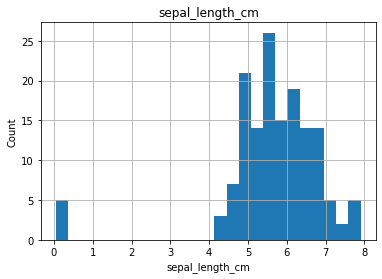

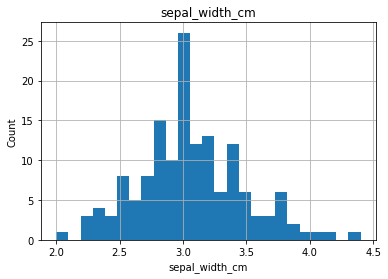

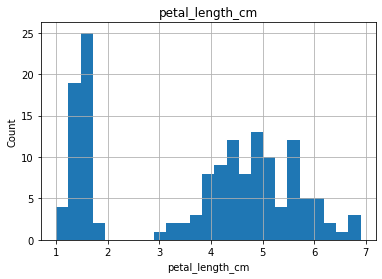

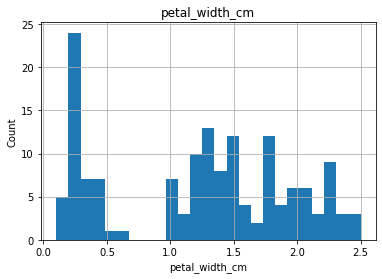

In [26]:
###Histogram to check the distribution of numerical columns (to check the normal distribution)
for feature in numerical_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [27]:
df['petal_width_cm'].isnull().sum()

0

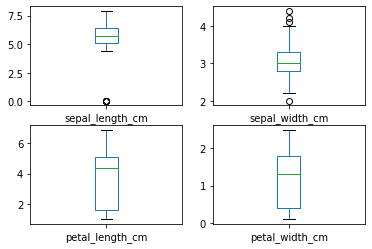

In [16]:
# scatter plot matrix

#scatter_matrix(dataset)
#plt.show()
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

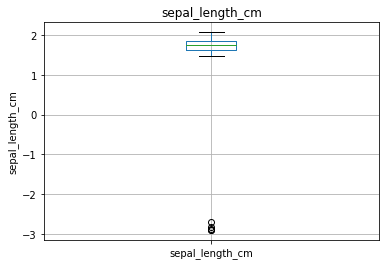

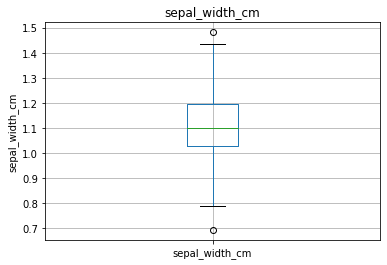

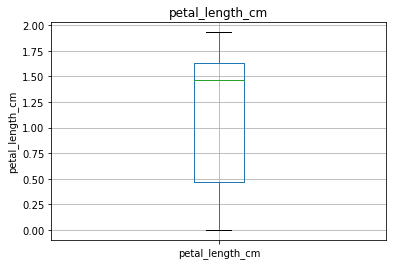

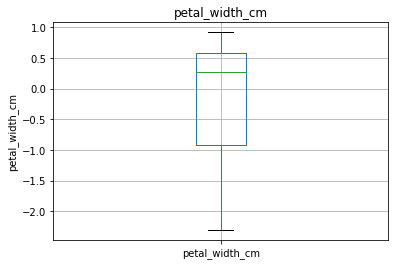

In [33]:
for feature in numerical_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

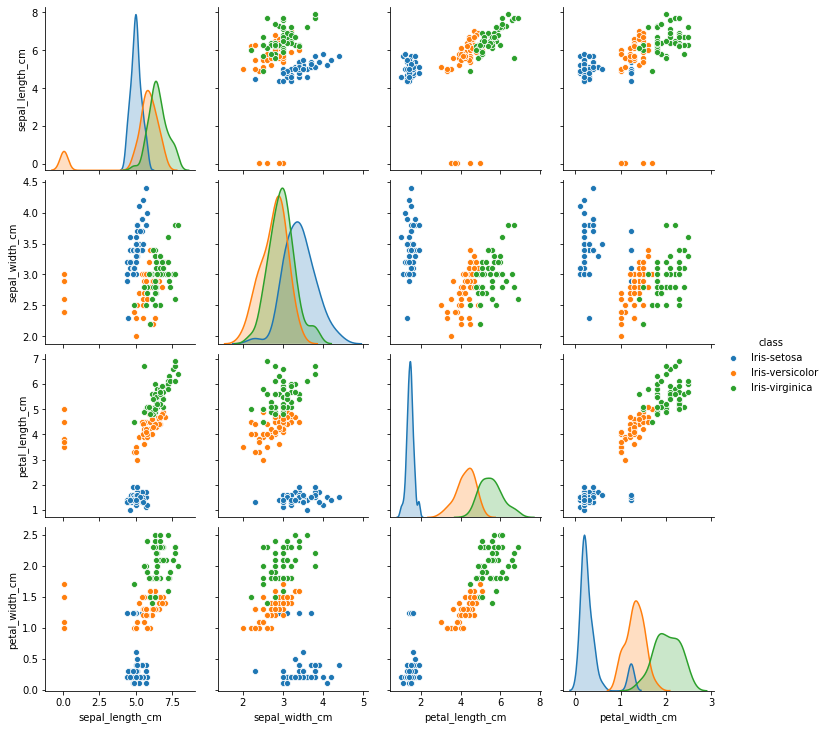

In [37]:
sns.pairplot(df,hue='class')

In [44]:
import math
math.sqrt(len(Y_test))

6.164414002968976

In [46]:
###Model building where target variable is class i.e. categorical feature and other numerical features are independent
X=df[numerical_feature]
Y=df['class']

##Splitting the train and test data with 75-25
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=123)

####importing Kneighbor classificatio
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=9,p=3,metric='euclidean')
KNN.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9, p=3)

In [47]:
###finding the prediction values

Y_train_pred = KNN.predict(X_train)
Y_test_pred = KNN.predict(X_test)

###Checking accuracy
from sklearn.metrics import accuracy_score
Acc_Train = accuracy_score(Y_train,Y_train_pred)
Acc_Test = accuracy_score(Y_test,Y_test_pred)
Acc_Train,Acc_Test

(0.9821428571428571, 1.0)

In [49]:
##confusion matrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Y_train,Y_train_pred)
CM

array([[34,  0,  0],
       [ 0, 41,  1],
       [ 0,  1, 35]], dtype=int64)

In [50]:
CM = confusion_matrix(Y_test,Y_test_pred)
CM

array([[16,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 14]], dtype=int64)

In [51]:
error = []
for i in range(1, len(Y_train)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_train)
    error.append(np.mean(pred_i != Y_train))

In [53]:
len(Y_train),len(error)

(112, 111)

In [65]:
sub = pd.DataFrame()
sub['sepal_length_cm']=X_test['sepal_length_cm']
sub['sepal_width_cm']=X_test['sepal_width_cm']
sub['petal_length_cm']=X_test['petal_length_cm']
sub['petal_width_cm']=X_test['petal_width_cm']
sub['class']=Y_test_pred



In [66]:
sub.to_csv('iris_submission.csv',index=False)

In [73]:
###Fitting Logistic Classifier on the data
classifier = LogisticRegression(random_state = 123, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=123)

In [74]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)
### Print results 
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("Y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(Y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

Y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
Iris-versicolor | Iris-versicolor | 0.0        | 0.58          | 0.42      
Iris-virginica | Iris-virginica | 0.0        | 0.07          | 0.93      
Iris-virginica | Iris-virginica | 0.0        | 0.04          | 0.96      
Iris-versicolor | Iris-versicolor | 0.03       | 0.94          | 0.04      
Iris-setosa | Iris-setosa | 0.96       | 0.04          | 0.0       
Iris-virginica | Iris-versicolor | 0.0        | 0.53          | 0.47      
Iris-versicolor | Iris-versicolor | 0.01       | 0.87          | 0.13      
Iris-setosa | Iris-setosa | 0.97       | 0.03          | 0.0       
Iris-setosa | Iris-setosa | 0.96       | 0.04          | 0.0       
Iris-versicolor | Iris-versicolor | 0.01       | 0.93          | 0.07      
Iris-virginica | Iris-virginica | 0.0        | 0.1           | 0.9       
Iris-setosa | Iris-setosa | 0.99       | 0.01          | 0.0 

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)


[[16  0  0]
 [ 0  8  0]
 [ 0  2 12]]


In [81]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.9473684210526315
